[[0 1 1 ... 0 0 1]
 [0 1 0 ... 0 0 1]
 [0 1 1 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [0 1 1 ... 0 1 1]
 [0 0 1 ... 1 0 0]]
Enter the number of iterations : 20
Enter rows and columns for the final grid in the format 'a b':4 5


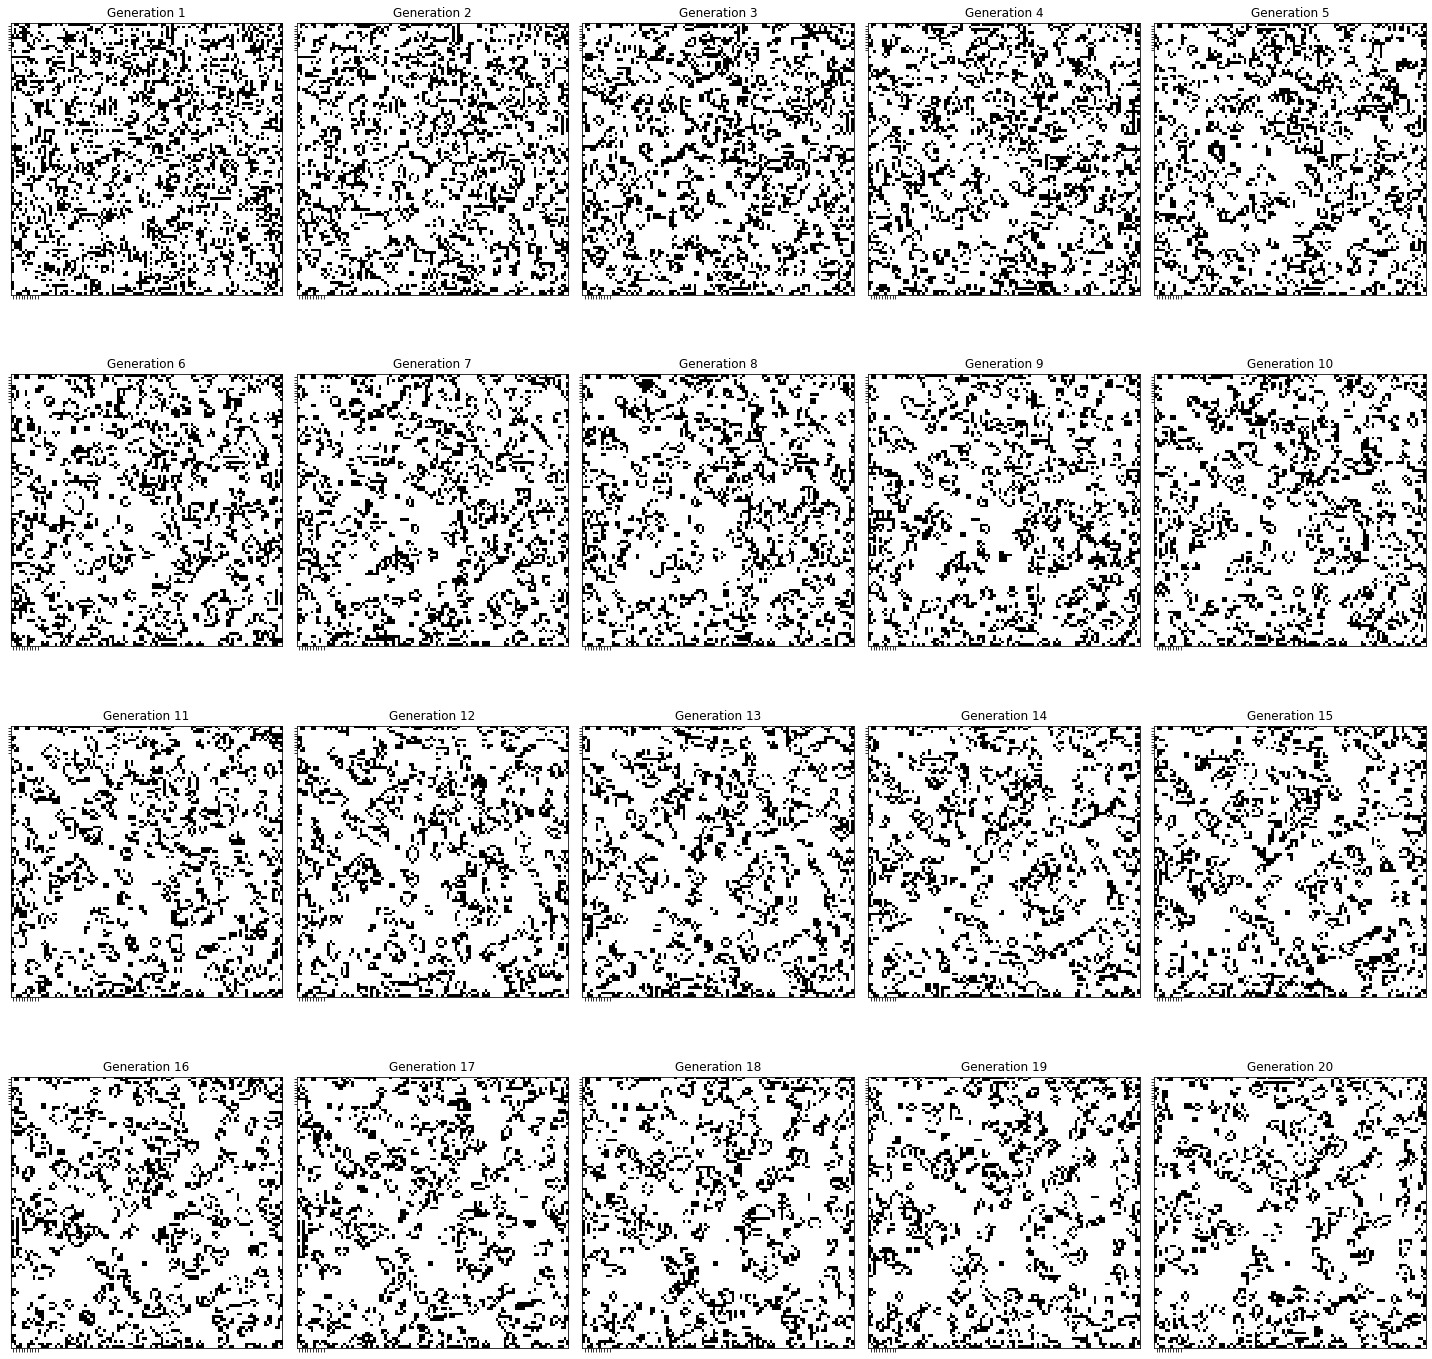

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

def iterate(Z):
    shape = len(Z), len(Z[0])
    N = [[0,]*(shape[0]+2)  for i in range(shape[1]+2)]
    # Compute number of neighbours for each cell
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]            +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    # Update cells
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            if Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
            elif Z[x][y] == 1 and not N[x][y] in [2,3]:
                Z[x][y] = 0
    return Z

# The 'beehive' pattern

Z = np.random.randint(2, size=(100,100))

print(Z)
n_generations = int(input("Enter the number of iterations : "))
a,b=list(map(int,input("Enter rows and columns for the final grid in the format 'a b':").split()))
if(a*b!=n_generations):
    print("rows and columns do not match number of iterations. Exiting...")
else:
    fig, axes = plt.subplots(a, b, figsize=(20, 20))
    for i in range(n_generations):
        iterate(Z)
        ax = axes.flat[i]
        ax.imshow(Z, interpolation='nearest', cmap=plt.cm.binary)
        #ax.grid(True, color="k")
        ax.set_xticks(np.arange(10)+.5)
        ax.set_yticks(np.arange(10)+.5)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.set_title('Generation {}'.format(i+1))
    plt.tight_layout()
    plt.show()